In [ ]:
import os
import random
import time
from datetime import timedelta
from multiprocessing import cpu_count

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid

In [ ]:
SEED = 42

os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.benchmark = True

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def fake_z(batch_size, noise, device):
    return torch.randn(batch_size, noise, device=device)

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = MNIST(root='./data', train=False, transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
BATCH_SIZE = 2 ** 8

# Change NUM_WORKERS if you may
if cpu_count() > 5:
    NUM_WORKERS = cpu_count() // 2
elif cpu_count() < 2:
    NUM_WORKERS = 0
else:
    NUM_WORKERS = 2

trainloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
testloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS)

In [ ]:
class Generator(nn.Module):
    def __init__(self, noise, hidden):
        super().__init__()
        self.lin1 = nn.Linear(noise, hidden)
        self.lin2 = nn.Linear(hidden, hidden)
        self.lin3 = nn.Linear(hidden, 28 * 28)

    def forward(self, x):
        x = F.dropout(F.relu(self.lin1(x)), 0.1)
        x = F.dropout(F.relu(self.lin2(x)), 0.1)
        output = torch.tanh(self.lin3(x))
        return output

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, hidden):
        super().__init__()
        self.lin1 = nn.Linear(28 * 28, hidden)
        self.lin2 = nn.Linear(hidden, hidden)
        self.lin3 = nn.Linear(hidden, 1)

    def forward(self, x):
        x = F.dropout(F.leaky_relu(self.lin1(x)), 0.1)
        x = F.dropout(F.leaky_relu(self.lin2(x)), 0.1)
        output = torch.sigmoid(self.lin3(x))
        return output

In [ ]:
noise = 100
hidden = 256
learning_rate = 0.0001

generator = Generator(noise, hidden).to(device)
discriminator = Discriminator(hidden).to(device)

gen_optimizer = optim.Adam(generator.parameters(), lr=learning_rate)
dis_optimizer = optim.Adam(discriminator.parameters(), lr=learning_rate)

criterion = nn.BCELoss().to(device)

Epoch [5/300] Elapsed time: 0:01:10.903606
Epoch [10/300] Elapsed time: 0:02:21.530107
Epoch [15/300] Elapsed time: 0:03:32.717781
Epoch [20/300] Elapsed time: 0:04:43.326407


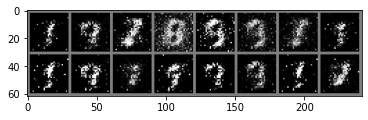

Epoch [25/300] Elapsed time: 0:05:54.923484
Epoch [30/300] Elapsed time: 0:07:06.612481
Epoch [35/300] Elapsed time: 0:08:18.146799
Epoch [40/300] Elapsed time: 0:09:29.889966


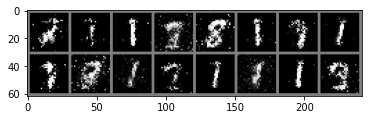

Epoch [45/300] Elapsed time: 0:10:41.516938
Epoch [50/300] Elapsed time: 0:11:53.220648
Epoch [55/300] Elapsed time: 0:13:05.042991
Epoch [60/300] Elapsed time: 0:14:16.572854


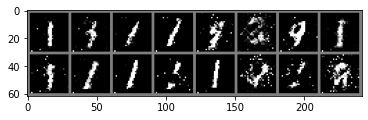

Epoch [65/300] Elapsed time: 0:15:28.506730
Epoch [70/300] Elapsed time: 0:16:40.167667
Epoch [75/300] Elapsed time: 0:17:52.178114
Epoch [80/300] Elapsed time: 0:19:03.974795


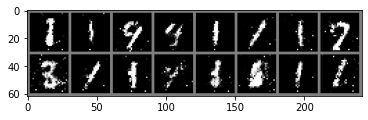

Epoch [85/300] Elapsed time: 0:20:16.277194
Epoch [90/300] Elapsed time: 0:21:28.222514
Epoch [95/300] Elapsed time: 0:22:40.033770
Epoch [100/300] Elapsed time: 0:23:51.942780


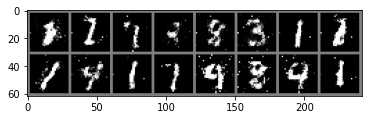

Epoch [105/300] Elapsed time: 0:25:04.256253
Epoch [110/300] Elapsed time: 0:26:16.010558
Epoch [115/300] Elapsed time: 0:27:28.136440
Epoch [120/300] Elapsed time: 0:28:40.395303


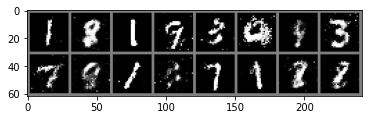

Epoch [125/300] Elapsed time: 0:29:53.133225
Epoch [130/300] Elapsed time: 0:31:05.300302
Epoch [135/300] Elapsed time: 0:32:17.456992
Epoch [140/300] Elapsed time: 0:33:29.445144


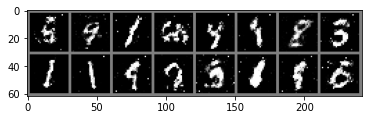

Epoch [145/300] Elapsed time: 0:34:41.649696
Epoch [150/300] Elapsed time: 0:35:53.728566
Epoch [155/300] Elapsed time: 0:37:05.688651
Epoch [160/300] Elapsed time: 0:38:17.919976


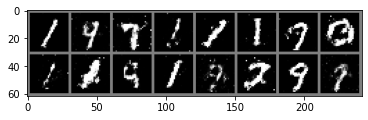

Epoch [165/300] Elapsed time: 0:39:30.132137
Epoch [170/300] Elapsed time: 0:40:42.218230
Epoch [175/300] Elapsed time: 0:41:54.167796
Epoch [180/300] Elapsed time: 0:43:05.896146


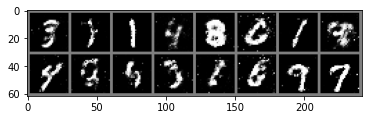

Epoch [185/300] Elapsed time: 0:44:17.869912
Epoch [190/300] Elapsed time: 0:45:29.849694
Epoch [195/300] Elapsed time: 0:46:41.631347
Epoch [200/300] Elapsed time: 0:47:53.472937


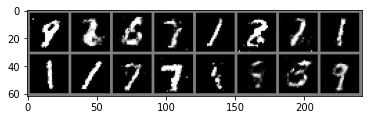

Epoch [205/300] Elapsed time: 0:49:05.950276
Epoch [210/300] Elapsed time: 0:50:18.558716
Epoch [215/300] Elapsed time: 0:51:31.139736
Epoch [220/300] Elapsed time: 0:52:43.371081


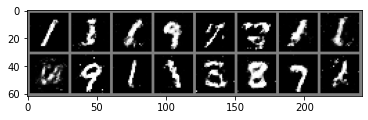

Epoch [225/300] Elapsed time: 0:53:55.750672
Epoch [230/300] Elapsed time: 0:55:08.195203
Epoch [235/300] Elapsed time: 0:56:20.684027
Epoch [240/300] Elapsed time: 0:57:33.029112


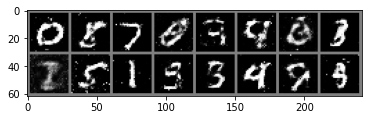

Epoch [245/300] Elapsed time: 0:58:45.359329
Epoch [250/300] Elapsed time: 0:59:57.676465
Epoch [255/300] Elapsed time: 1:01:09.943334
Epoch [260/300] Elapsed time: 1:02:22.350957


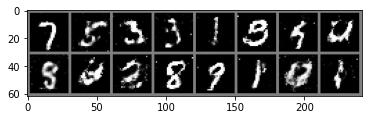

Epoch [265/300] Elapsed time: 1:03:34.565560
Epoch [270/300] Elapsed time: 1:04:46.847237
Epoch [275/300] Elapsed time: 1:05:59.312029
Epoch [280/300] Elapsed time: 1:07:11.560853


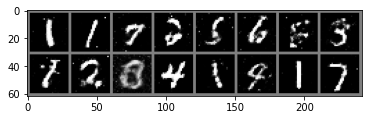

Epoch [285/300] Elapsed time: 1:08:24.520777
Epoch [290/300] Elapsed time: 1:09:36.977293
Epoch [295/300] Elapsed time: 1:10:48.800986
Epoch [300/300] Elapsed time: 1:12:00.551700


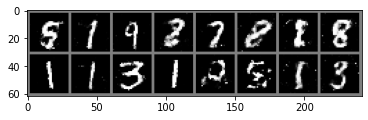

In [ ]:
EPOCHS = 300

start = time.time()

for ep in range(EPOCHS):

    generator.train()
    discriminator.train()

    for image, _ in trainloader:
        batch_size = image.size(0)

        image = image.to(device)
 
        real_label = torch.ones(batch_size).view(-1, 1).to(device)
        fake_label = torch.zeros(batch_size).view(-1, 1).to(device)

        dis_optimizer.zero_grad()

        real_output = discriminator(image.view(-1, 28 * 28))
        fake_output = discriminator(generator(fake_z(batch_size, noise, device)))

        real_loss = criterion(real_output, real_label)
        fake_loss = criterion(fake_output, fake_label)
        dis_loss = real_loss + fake_loss
  
        dis_loss.backward()
        dis_optimizer.step()

        gen_optimizer.zero_grad()
  
        fake_output = discriminator(generator(fake_z(batch_size, noise, device)))
  
        gen_loss = criterion(fake_output, real_label)
  
        gen_loss.backward()
        gen_optimizer.step()

    # Print time spent every 5 epochs
    if (ep + 1) % 5 == 0:
        print('Epoch [{}/{}] Elapsed time: {}'.format(ep + 1, EPOCHS, timedelta(seconds=time.time() - start)))

    # Generate 16 images every 20 epochs
    if (ep + 1) % 20 == 0:
        discriminator.eval()
        generator.eval()

        with torch.no_grad():
            image = make_grid(generator(fake_z(16, noise, device)).view(-1, 1, 28, 28).detach().cpu())
            image = (image + 1) / 2
            image = image.numpy()
            image = np.transpose(image, (1, 2, 0))
            plt.imshow(image)
            plt.show()